# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [6]:
df_test.shape

(14910, 52)

In [7]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [8]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [23]:
df = df_test.append(df_train).reset_index(drop=True)

In [10]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [12]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Два и более высших образования', 'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Ученая степень', 'Среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Туризм', 'Юридические услуги/нотариальные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Транспорт', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Торговля', 'Энергетика', 'Банк/Финансы', 'Сельское хозяйство', 'Информационные услуги', 'Другие сферы', 'Логистика', 'Недвижимость', 'Государственная служба', 'Образование', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Информационные технологии', 'Строительство', 'Развлечения/Искусство', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Салоны красоты и здоровья', 'Здравоохранение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [13]:
#===============================================
# 1. Заменяем запятые на точки и приводим к числам
ToNum = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
for i in ToNum:
    df[i] = df[i].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [14]:
#======================================
# 2. Находим столбцы с пропусками
for i in df.columns: # заменяем пустые строки на NULL
    df[i].replace('', np.nan, inplace=True)
Kat_ToFill = df.columns
for i in df.columns:
    n = df[i].isnull().count()
    nn = df[i].notnull().count()
    c = df[i].count()
    if n == c:
        Kat_ToFill = Kat_ToFill.drop(i)
    else:
        print (c, ':',n ,':',df[i].name,':',df[i].dtype)
# при данном написании count считает только не NULL записи??? а isnull и notnull все, что я делаю не так?
# ВОПРОС: может быть правильнее сначала разибраться с кетагериями, а потом с пропусками?
# Потому что часть категорий с недостоящими данными я планирую просто удалить, и да, вы сами же рекомендуете категории <10% в прочие, а тут пустыъх данных как раз макс. 10%?
# Категориальные пропуски – по-хорошему видимо надо дополнить значениями по имеющемуся распределению, но учить мат. часть нет времени нет, дополню макс. значениями
# PREVIOUS_CARD_NUM_UTILIZED – очень мало данных, просто удаляем столбец.
# ВОПРОС: вообще это спорно, что лучше удалять пустые строки или забивать потенциально ложными значениями
# WORK_TIME - добавляем медианой
# ВОПРОС: в предобработке предполагается чистить пропуски и "оцифровывать" категории, а сами данные никак не надо чистить?
# Например WORK_TIME содержит явные ошибки, время работы миллион месяцев, вообще если детально посмотреть df.hist(), можно и другие странности найти

27420 : 30133 : GEN_INDUSTRY : object
27420 : 30133 : GEN_TITLE : object
27420 : 30133 : ORG_TP_STATE : object
27425 : 30133 : ORG_TP_FCAPITAL : object
27420 : 30133 : JOB_DIR : object
29543 : 30133 : TP_PROVINCE : object
30131 : 30133 : REGION_NM : object
27416 : 30133 : WORK_TIME : float64
600 : 30133 : PREVIOUS_CARD_NUM_UTILIZED : float64


In [15]:
#========================================
# 3. Заполняем пустые числовые медианой
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()

In [16]:
# 4. Заполняем пустые категории макс. значением, можно и в предыдущем цикле сделать
# Предварительно удаляем из выборки числовые столбцы
Kat_ToFill = Kat_ToFill.drop('WORK_TIME')
Kat_ToFill = Kat_ToFill.drop('PREVIOUS_CARD_NUM_UTILIZED')
for i in Kat_ToFill:
    df.loc[df[i].isnull(), i] = df[i].value_counts()[0] #Counts возвращает отсортированные по убыванию

In [17]:
#================================
# 5. Проверяем результат
for i in df.columns:
    n = df[i].isnull().count()
    nn = df[i].notnull().count()
    c = df[i].count()
    if n != c:
        print (c, ':',n ,':',df[i].name,':',df[i].dtype)


600 : 30133 : PREVIOUS_CARD_NUM_UTILIZED : float64


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [18]:
#=====================
# 6. анализ категорий 
# используем чему учили + оставляем самый крупные значения, остальное сливаем в прочее, критерий, например, прочее <=10% всего.
# ВОПРОС: как показала практика универсального нормального правила нет:
# Вариант 1 - если прочее когда сама категория <10%, то некоторые категории полностью схлопываются в Прочее
# Вариант 2 - если прочее это хвост, когда они в сумме дают <10%, то остаётся много длинных категорий
# - в итоге сделал вариант 1, там где всё ушло в прочее вообще удалил столбец

# В GEN_INDUSTRY есть "Другие сферы" предварительно переименовываем в "Прочие", чтобы отдельно не возиться
df.loc[:,'GEN_INDUSTRY'] = df.loc[:,'GEN_INDUSTRY'].replace({'Другие сферы': 'Прочее'})

# Переименовываем маленькие категoрии в прочие
# Перечень всех категорий
Kat = df.columns
for i in df.columns:
    if str(df[i].dtype) != 'object':
        Kat = Kat.drop(i) 
# Перебираем все категории
for j in Kat:
    KatVal = df[j].value_counts()
    KatVal_Other = KatVal.index
# Находим значения категорий с показателем <10% от "всего"
    for i in KatVal.index:
        if KatVal[i] > KatVal.sum()*0.1:
            KatVal_Other = KatVal_Other.drop(i) 
#Значения категорий с количеством =<10% переименовываем в прочие
    for i in KatVal_Other:
        df.loc[:,j] = df.loc[:,j].replace({i: 'Прочее'})

In [30]:
# 7. Проверяем результат
for i in df.columns:
    if str(df[i].dtype) == 'object':
        print('='*10)
        print(i)
        print(df[i].value_counts())
        print('\n')

EDUCATION
Среднее специальное    12869
Среднее                 9255
Высшее                  6227
Прочее                  1782
Name: EDUCATION, dtype: int64


MARITAL_STATUS
Состою в браке        18465
Не состоял в браке     7222
Прочее                 4446
Name: MARITAL_STATUS, dtype: int64


GEN_INDUSTRY
Прочее      25426
Торговля     4707
Name: GEN_INDUSTRY, dtype: int64


GEN_TITLE
Специалист    13981
Прочее        10127
Рабочий        6025
Name: GEN_TITLE, dtype: int64


ORG_TP_STATE
Частная компания                12896
Государственная комп./учреж.    12152
Прочее                           5085
Name: ORG_TP_STATE, dtype: int64


ORG_TP_FCAPITAL
Без участия    27099
Прочее          3034
Name: ORG_TP_FCAPITAL, dtype: int64


JOB_DIR
Участие в основ. деятельности    22613
Прочее                            7520
Name: JOB_DIR, dtype: int64


FAMILY_INCOME
от 10000 до 20000 руб.    13999
от 20000 до 50000 руб.    11984
от 5000 до 10000 руб.      3067
Прочее                     1083
Name

In [19]:
ToDel = ['AGREEMENT_RK', 'FACT_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
for i in ToDel:
    df = df.drop(i, axis=1)

In [86]:
# 8. Удаляем ненужные столбцы, один заполненный, остальные категории ушедншие в прочее, см. выше :'PREVIOUS_CARD_NUM_UTILIZED', 
# Не понятно, что делать: для некоторых столбцо labels .. not contained in axis, а для некоторых наоборот
ToDel = ['AGREEMENT_RK', 'FACT_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
for i in ToDel:
    df = df.drop(i, axis=1)

In [20]:
# 9. Замена категориальных признаков
# Перечень всех категорий
Kat = df.columns
for i in df.columns:
    if str(df[i].dtype) != 'object':
        Kat = Kat.drop(i) 
# Перебираем все категории и заменяем их столбцами OneHotEncoding
for j in Kat:
    for i in df[j].unique():
        df[j + '=' + i] = (df[j] == i).astype(float)
    df = df.drop(j, axis=1)



#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [21]:
def preproc_data(df_input):
    df_output = df_input.copy()
# 1. Заменяем запятые на точки и приводим к числам
    ToNum = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in ToNum:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
# 2. Находим столбцы с пропусками: категории заполняем самым частым значением и числовые -- медианой
    for i in df_output.columns: df_output[i].replace('', np.nan, inplace=True) # заменяем пустые строки на NULL
    for i in df_output.columns:
        if (df_output[i].isnull().count() != df_output[i].count()):
            if df_output[i].dtype == 'object':
                df_output.loc[df_output[i].isnull(), i] = df_output[i].value_counts()[0] #Counts возвращает отсортированные по убыванию, поэтому берём первый элемент
            else:
                df_output.loc[df_output[i].isnull(),i] = df_output[i].median()
# 3. Редкие категиории (<10% от всего) переименовываем в "Прочие" 
    # В GEN_INDUSTRY есть "Другие сферы" предварительно переименовываем в "Прочие", чтобы отдельно не возиться
    df_output.loc[:,'GEN_INDUSTRY'] = df_output.loc[:,'GEN_INDUSTRY'].replace({'Другие сферы': 'Прочее'})
    # Перечень всех категорий
    Kat = df_output.columns
    for i in df_output.columns:
        if str(df_output[i].dtype) != 'object':
            Kat = Kat.drop(i) 
    # Перебираем все категории
    for j in Kat:
        KatVal = df_output[j].value_counts()
        KatVal_Other = KatVal.index
    # Находим значения категорий с показателем <10% от "всего"
        for i in KatVal.index:
            if KatVal[i] > KatVal.sum()*0.1:
                KatVal_Other = KatVal_Other.drop(i) 
    #Значения категорий с количеством =<10% переименовываем в прочие
    #Криво, кончно, можно в одном цикле всё сделать
        for i in KatVal_Other:
            df_output.loc[:,j] = df_output.loc[:,j].replace({i: 'Прочее'})
# 4. Удаляем ненужные столбцы: идентификаторо, почти пустой  категории ушедншие в прочее, см. выше :'PREVIOUS_CARD_NUM_UTILIZED', 
    ToDel = ['AGREEMENT_RK', 'FACT_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
    for i in ToDel:
        df_output = df_output.drop(i, axis=1)
# 5. Замена категориальных признаков, one hot
    # Перечень всех категорий
    Kat = df_output.columns
    Kat = Kat.drop('sample') #исключаем признак train / test
    for i in df_output.columns:
        if str(df_output[i].dtype) != 'object':
            Kat = Kat.drop(i) 
    # Перебираем все категории и заменяем их столбцами OneHotEncoding
    for j in Kat:
        for i in df_output[j].unique():
            df_output[j + '=' + i] = (df_output[j] == i).astype(float)
        df_output = df_output.drop(j, axis=1)


    return df_output

In [25]:
df = df_test.append(df_train).reset_index(drop=True) #Заново формируем исходнубю выборку
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [26]:
X = df_train_preproc.drop('TARGET', axis=1)
X_TEST = df_test_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']
y_TEST = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
# test_size=0.3, random_state=42 (правило случайного разбиения)
#
## Your Code Here

C:\Users\EinGast\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [64]:
#1. Модель. DecisionTreeClassifier
DTC = DecisionTreeClassifier()                    
DTC.fit(X_train, y_train)
predict_DTC = DTC.predict(X_test)

#2. Модель. RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predict_RFC = RFC.predict(X_test)

#3. Модель. LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predict_LR = LR.predict(X_test)

In [43]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [77]:
#собираем все предсказания в один фрейм
predict_all = pd.DataFrame(data = {'predict_DTC': predict_DTC, 'predict_RFC':predict_RFC, 'predict_LR': predict_LR})
predict_metrics = pd.DataFrame(columns = ['Model', 'Metric', 'Value'])
j = 0
for i in predict_all.columns:
    predict_metrics.loc[j]=[i, 'precision', precision_score(y_test, predict_all[i])]
    predict_metrics.loc[j+1]=[i, 'recall', recall_score(y_test, predict_all[i])]
    predict_metrics.loc[j+2]=[i, 'accuracy', accuracy_score(y_test, predict_all[i])]
    j = j + 3
print (predict_metrics)

         Model     Metric     Value
0  predict_DTC  precision  0.150685
1  predict_DTC     recall  0.162295
2  predict_DTC   accuracy  0.787221
3  predict_RFC  precision  0.192308
4  predict_RFC     recall  0.008197
5  predict_RFC   accuracy  0.875398
6   predict_LR  precision  0.375000
7   predict_LR     recall  0.004918
8   predict_LR   accuracy  0.878185


In [47]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
## Your Code Here


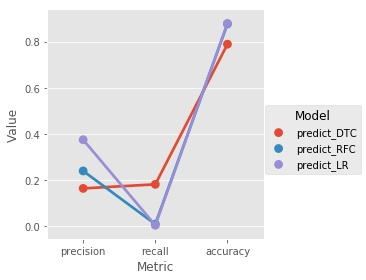

In [48]:
sns.factorplot('Metric','Value',data=predict_metrics,hue='Model');

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
## Your Code Here

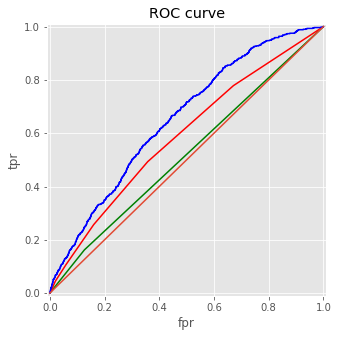

In [87]:
# Форматирование графика
plt.figure(figsize=(5, 5))
#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

predict_proba = DTC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr, tpr, color='green')

predict_proba = RFC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr, tpr, color='red')

predict_proba = LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1])

0.6418095924294532

In [40]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

In [66]:
cross_val_score(DTC, X, y, scoring='roc_auc', cv=10).mean()

0.5291080712264506

In [67]:
cross_val_score(RFC, X, y, scoring='roc_auc', cv=10).mean()

0.5913098659055613

In [68]:
cross_val_score(LR, X, y, scoring='roc_auc', cv=10).mean()

0.6443075924775009

In [63]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
predict = LR.predict_proba(X_TEST)

In [78]:
cross_val_score(LR, X_TEST, y_TEST, scoring='roc_auc', cv=10).mean()

0.6153773339122883

0.6321472427268778

0.6321472427268778


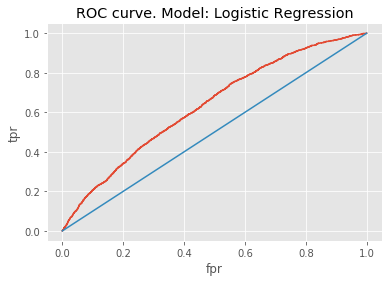

In [106]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
print (roc_auc_score(y_TEST, predict[:,1]))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve. Model: Logistic Regression')
fpr, tpr, thresholds = roc_curve(y_TEST, predict[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)